In [60]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
tf.__version__

'2.9.1'

In [5]:
keras.__version__

'2.9.0'

In [6]:
np.__version__

'1.23.0'

In [7]:
pd.__version__

'1.1.3'

In [8]:
from keras.datasets import mnist

In [46]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [47]:
X = np.concatenate([X_train,X_test])

In [48]:
y = np.concatenate([y_train,y_test])

In [49]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.2)

In [50]:
X_train, X_validation, y_train, y_validation = \
train_test_split(X_train_full,y_train_full,test_size=.2)

8


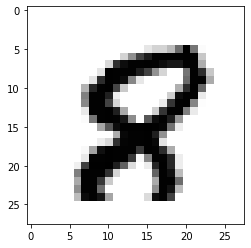

In [32]:
print(y_train[0])
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [33]:
X_train.shape

(44800, 28, 28)

In [51]:
X_train = X_train.reshape(-1,28*28)
X_validation = X_validation.reshape(-1,28*28) 
X_test = X_test.reshape(-1,28*28)

In [70]:
y_train =  to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

In [39]:
X_train.shape
y_train.shape

(44800, 784)

(44800, 10)

In [64]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

In [53]:
rf_model = RandomForestClassifier()

In [54]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
dt_model = DecisionTreeClassifier()

In [71]:
## fully_connected -- layer

In [75]:
X_train.shape

(44800, 784)

In [74]:
from keras.models import Sequential
from keras.layers import Dense

In [94]:
y_train.shape[-1]

10

In [98]:
input_shape = X_train.shape[1:]
output_shape= y_train.shape[-1]
first_model = Sequential()
first_model.add(Dense(100,activation='relu',input_shape=input_shape))
first_model.add(Dense(50,activation='sigmoid'))
first_model.add(Dense(output_shape,activation='softmax'))

In [99]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
first_model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metrics
)

In [100]:
x = X_train
y = y_train
epochs = 20
batch_size = 200
validation_data = (X_validation, y_validation) 
first_model.fit(
    x = x,
    y = y,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = validation_data
)

Epoch 1/20
224/224 [==============================] - 1s 5ms/step - loss: 0.9440 - accuracy: 0.7655 - val_loss: 0.4954 - val_accuracy: 0.8843
Epoch 2/20
224/224 [==============================] - 1s 4ms/step - loss: 0.3828 - accuracy: 0.9006 - val_loss: 0.3022 - val_accuracy: 0.9177
Epoch 3/20
224/224 [==============================] - 1s 5ms/step - loss: 0.2781 - accuracy: 0.9207 - val_loss: 0.2518 - val_accuracy: 0.9293
Epoch 4/20
224/224 [==============================] - 1s 4ms/step - loss: 0.2369 - accuracy: 0.9308 - val_loss: 0.2313 - val_accuracy: 0.9314
Epoch 5/20
224/224 [==============================] - 1s 4ms/step - loss: 0.2144 - accuracy: 0.9376 - val_loss: 0.2214 - val_accuracy: 0.9351
Epoch 6/20
224/224 [==============================] - 1s 4ms/step - loss: 0.1986 - accuracy: 0.9401 - val_loss: 0.1996 - val_accuracy: 0.9413
Epoch 7/20
224/224 [==============================] - 1s 4ms/step - loss: 0.1841 - accuracy: 0.9450 - val_loss: 0.1962 - val_accuracy: 0.9433
Epoch 

In [101]:
first_model.evaluate(X_test,y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.1401 - accuracy: 0.9599


[0.14007484912872314, 0.959857165813446]

In [102]:
from keras.datasets import fashion_mnist

In [112]:
(X_train_full, y_train_full), (X_test, y_test)  = fashion_mnist.load_data()

In [113]:
X = np.concatenate([X_train_full, X_test])
y = np.concatenate([y_train_full,y_test])

In [115]:
X_train_full ,X_test, y_train_full, y_test = train_test_split(X,y,test_size=.2)

In [116]:
X_train, X_validation, y_train, y_validation =\
train_test_split(X_train_full,y_train_full,test_size=.2)

In [117]:
X_train.shape

(44800, 28, 28)

In [118]:
X_train = X_train.reshape(-1,28*28)
X_validation = X_validation.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

In [120]:
input_shape = X_train.shape[1:]
output_shape = y_test.shape[-1]
second_model = Sequential()
second_model.add(Dense(512,activation='sigmoid',input_shape=input_shape))
second_model.add(Dense(256,activation='relu'))
second_model.add(Dense(output_shape,activation='softmax'))

In [121]:
second_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [122]:

second_model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [123]:
second_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_validation,y_validation)
)

Epoch 1/10
700/700 [==============================] - 5s 6ms/step - loss: 0.8012 - accuracy: 0.6931 - val_loss: 0.7213 - val_accuracy: 0.7045
Epoch 2/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7715 - accuracy: 0.6950 - val_loss: 0.7452 - val_accuracy: 0.7121
Epoch 3/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7658 - accuracy: 0.6969 - val_loss: 0.6821 - val_accuracy: 0.7272
Epoch 4/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7509 - accuracy: 0.7083 - val_loss: 0.7426 - val_accuracy: 0.7249
Epoch 5/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7002 - accuracy: 0.7346 - val_loss: 0.6666 - val_accuracy: 0.7359
Epoch 6/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7108 - accuracy: 0.7249 - val_loss: 0.7182 - val_accuracy: 0.7416
Epoch 7/10
700/700 [==============================] - 4s 6ms/step - loss: 0.7130 - accuracy: 0.7288 - val_loss: 0.7209 - val_accuracy: 0.7126
Epoch 

In [124]:
second_model.evaluate(X_test,y_test)

438/438 [==============================] - 1s 3ms/step - loss: 0.6477 - accuracy: 0.7497


[0.6476635336875916, 0.7497143149375916]

2

1/1 [==============================] - 0s 27ms/step


2

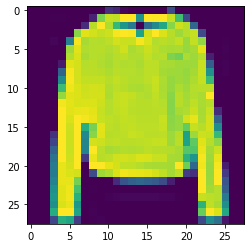

In [128]:
np.argmax(y_test[0])
plt.imshow(X_test[0].reshape(28,28))
np.argmax(second_model.predict(X_test[[0]]))